**Advantages: Decision Tree**
* Less requirement of data cleaning compared to other algorithms.
* you can visualize the decision tree. This is a major advantage, because most algorithms work like blackboxes, and it’s hard to clearly pinpoint what made the algorithm predict a specific result.
* No preprocessing required you don’t need to prepare the data before building the model.
* Data robustness the algorithm handles all types of data nicely.


You like the idea of asking for a second opinion, from an algorithm, when it’s time to make a decision that involves way too many variables to keep track of. Since Decision Trees are said to mimic how humans make decisions, that’s the algorithm you’re using.

In [13]:
import numpy as np
from sklearn import preprocessing

In [14]:
def encode_feature(array):
  'Encode a categorical array into number array'
  encoder = preprocessing.LabelEncoder()
  encoder.fit(array)
  return encoder.transform(array)

In [15]:
feature_names = ['Number_of_days','Family_joining','personal_budget','weather_forecast','Explore_new_places']
class_names = ['Countrysides','Beach']
features = np.array([[10, 'Yes', 950, 75, 'Yes'],
                     [10, 'Yes', 250, 78, 'Yes'],
                     [7, 'Yes', 600, 80, 'No'],
                     [8, 'Yes', 750, 67, 'Yes'],
                     [10, 'Yes', 800, 73, 'Yes'],
                     [8, 'Yes', 850, 64, 'Yes'],
                     [15, 'No', 350, 78, 'No'],
                     [8, 'Yes', 850, 81, 'Yes'],
                     [6, 'No', 750, 59, 'Yes'],
                     [12, 'Yes', 1050, 54, 'Yes'],
                     [10, 'No', 230, 74, 'No'],
                     [3, 'Yes', 630, 74, 'Yes'],
                     [10, 'Yes', 830, 74, 'No'],
                     [12, 'No', 730, 52, 'Yes']])

targets = np.array(['Countryside','Beach','Beach','Countryside',
                    'Beach', 'Countryside', 'Beach','Countryside',
                    'Beach', 'Beach', 'Countryside','Countryside',
                    'Beach', 'Beach'])

In [16]:
# Encoding categorical features
features[:,1] = encode_feature(features[:,1])
features[:,4] = encode_feature(features[:,4])
targets = encode_feature(targets)

Pre-processing: Done ✅

Now it’s time to build and visualize the Decision Tree.

In [17]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

|--- Family_joining <= 0.50
|   |--- class: 0
|--- Family_joining >  0.50
|   |--- personal_budget <= 615.00
|   |   |--- class: 0
|   |--- personal_budget >  615.00
|   |   |--- Number_of_days <= 9.00
|   |   |   |--- class: 1
|   |   |--- Number_of_days >  9.00
|   |   |   |--- weather_forecast <= 74.50
|   |   |   |   |--- class: 0
|   |   |   |--- weather_forecast >  74.50
|   |   |   |   |--- class: 1

  Number_of_days Family_joining personal_budget weather_forecast  \
0       0.261905       0.214286        0.261905         0.261905   

  Explore_new_places  
0                0.0  
Training Set Mean Accuracy = 1.0
Test Set Mean Accuracy = 0.67


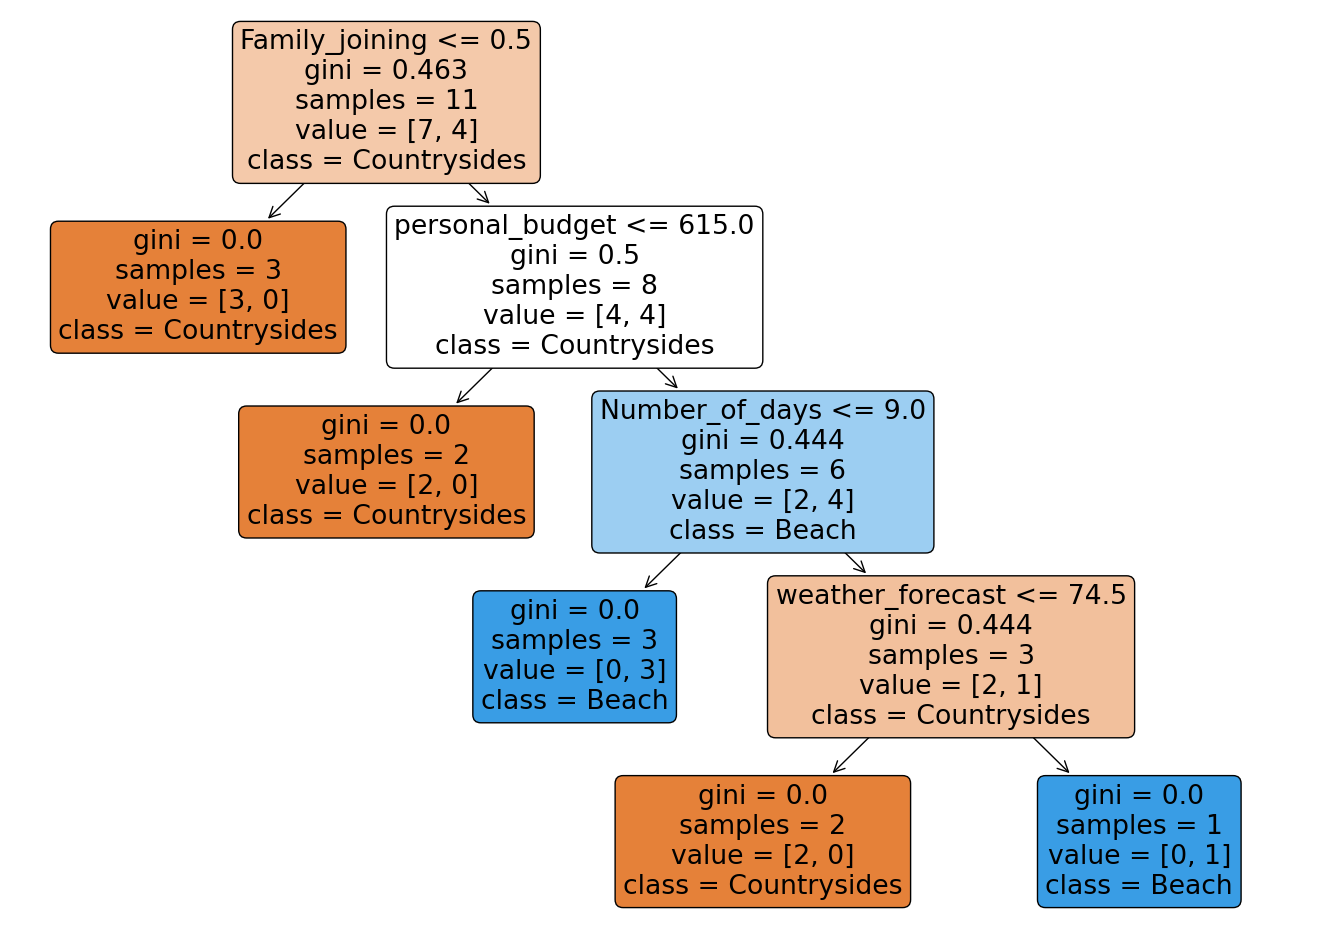

In [21]:
def print_feature_importance(names_array, importances_array):

    """ Prints out a feature importance array as a dataframe. """
    importances = pd.DataFrame(data = names_array)
    importances[1] = importances_array
    importances = importances.T
    importances.drop(0, axis=0, inplace=True)
    importances.columns = feature_names
    print(str(importances.reset_index(drop=True)))



def build_tree(features, targets, feature_names, class_names):
  """ Builds a decision tree.
        Prints out the decision tree 1) as a plot, 2) as text.
        Also outputs: 1) feature importance, 2) training set and test set mean accuracy of tree

        :param features: model features
        :param targets: model targets
        :param feature_names: names of the dataset features
    """
  train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=123)
  decision_tree = tree.DecisionTreeClassifier(random_state=456)
  decision_tree = decision_tree.fit(train_features, train_targets)

  # Visualizing the decision tree

    # 1. Saving the image of the decision as a png
  plt.subplots(figsize = (17,12))
  tree.plot_tree(decision_tree, feature_names = feature_names, filled = True, rounded = True, class_names = class_names)
  plt.savefig('Decision Tree.png')

    # 2. Output the tree as text in the console
  tree_as_text = tree.export_text(decision_tree, feature_names = feature_names)
  print(tree_as_text)

    # Feature Importance
    # Turns the feature importance array into a dataframe, so it has a table-like output format

  print_feature_importance(feature_names, decision_tree.feature_importances_)

    # Training and test mean accuracy
  train_error = np.round(decision_tree.score(train_features, train_targets), 2)
  test_error = np.round(decision_tree.score(test_features, test_targets), 2)

  print("Training Set Mean Accuracy = " + str(train_error))
  print("Test Set Mean Accuracy = " + str(test_error))


build_tree(features, targets, feature_names, class_names)

Building the model and visualizing the tree
By default ScikitLearn uses Gini Impurity as a loss function. But you can also use Entropy as the loss function and tune other parameters in the DecisionTreeClassifier.

With the model trained, you can visualize the resulting decision tree with the plot_tree method, and save as decision_tree.png.

You can also visualize the tree in the output console, you can use the export_text method.

**Feature Importances:**

noticed the feature explore_new_places doesn’t show up anywhere. Even though you’re sure it’s an important part of your decision process.

To get to the bottom of this and understand why explore_new_places is not used in the model you lookup the feature_importances_ property in the decision tree model. This will tell you how much each features contributes to the accuracy of the model.

The feature_importances_ property is simply an array of values, with each value corresponding to a feature of the model, with the same order as the input dataset.

So, for better readability, you can decided to create the function print_feature_importance and transform the value array from feature_importances_ property into a dataframe and use the feature names as headers.
explore_new_places has a feature importance of 0, which means it’s not used at all in the prediction.

At first glance you might be thinking, I can just get rid of this feature.

But feature importance doesn’t necessarily mean the feature is never going to be used in the model. It only means it was not used in this tree, which as a specific training-test split.

So you can’t eliminate this feature right away.
To confirm that explore_new_places is not relevant to the model, you can build several trees with different train-test splits f the dataset and check if explore_new_places still has zero importance.

# Model Performance
Finally, to evaluate the algorithm’s performance you calculate the mean accuracy of the predictions on both the training and test sets, using the score method. As you can see, this model is overfit and memorized the training set. And with a 67% of mean accuracy for the test set, it doesn’t generalize very well to observations it has never seen before.

**One Decision Tree is not enough**
Despite their advantages, Decision Trees don’t provide the same level of accuracy as other classification and regression algorithms.

Decision trees are prone to overfitting. If you build a very tall tree, splitting the feature set until you get pure leaf nodes, you’re likely overfitting the training set. The resulting tree is so complex that it’s also hard to read and interpret.

On the other hand, if your decision tree is very small it underfits the data, resulting in high bias.

# The power hidden in the forest
A single Decision Tree by itself has subpar accuracy, when compared to other machine learning algorithms. One tree alone typically doesn’t generate the best predictions, but the tree structure makes it easy to control the bias-variance trade-off.

**A single Decision Tree is not powerful enough, but an entire forest is!**
In algorithms that combine multiple trees and control for bias or variance, like Random Forests, the model has a much better performance when compared to a single decision tree.